<a href="https://colab.research.google.com/github/jchoe14/BMDW-Assignment/blob/master/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**This is my notebook for BMDW-Assignment**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
case_df = pd.read_csv('/content/drive/My Drive/data_science_workshop/case_data.csv')
control_df = pd.read_csv('/content/drive/My Drive/data_science_workshop/control_data.csv')

In [4]:
full_df = pd.concat([case_df,control_df])
full_df.head()

,Phenotype_A,Phenotype_B,Phenotype_C,Phenotype_D,Phenotype_E,predicted_label,sample_ID
0,1.050628,-0.445277,-0.463085,1.219458,-0.529953,case,Case_0
1,-0.121457,3.144045,0.729768,0.651428,2.094041,control,Case_1
2,1.562387,1.815261,-0.890487,1.739647,-0.879858,case,Case_2
3,0.120096,0.478846,-1.628602,0.120849,-1.273124,case,Case_3
4,0.880065,1.087070,-0.762285,0.716837,0.040455,control,Case_4


In [42]:
full_df = full_df.dropna(how='any')
full_df.head()

,Phenotype_A,Phenotype_B,Phenotype_C,Phenotype_D,Phenotype_E,predicted_label,sample_ID
0,1.050628,-0.445277,-0.463085,1.219458,-0.529953,case,Case_0
1,-0.121457,3.144045,0.729768,0.651428,2.094041,control,Case_1
2,1.562387,1.815261,-0.890487,1.739647,-0.879858,case,Case_2
3,0.120096,0.478846,-1.628602,0.120849,-1.273124,case,Case_3
4,0.880065,1.087070,-0.762285,0.716837,0.040455,control,Case_4


In [8]:
!conda install statsmodels

/bin/bash: conda: command not found


In [6]:
from scipy import *

In [7]:
import scipy.stats as stats

In [34]:
df = pd.DataFrame(index=['Phenotype_A','Phenotype_B','Phenotype_C','Phenotype_D','Phenotype_E'], columns=['Phenotype_A','Phenotype_B','Phenotype_C','Phenotype_D','Phenotype_E'])

In [9]:
df.loc['Phenotype_A', 'Phenotype_B'] = stats.pearsonr(full_df['Phenotype_A'], full_df['Phenotype_B'])[0]
df.loc['Phenotype_A', 'Phenotype_C'] = stats.pearsonr(full_df['Phenotype_A'], full_df['Phenotype_C'])[0]
df.loc['Phenotype_A', 'Phenotype_D'] = stats.pearsonr(full_df['Phenotype_A'], full_df['Phenotype_D'])[0]
df.loc['Phenotype_A', 'Phenotype_E'] = stats.pearsonr(full_df['Phenotype_A'], full_df['Phenotype_E'])[0]
df.loc['Phenotype_B', 'Phenotype_C'] = stats.pearsonr(full_df['Phenotype_B'], full_df['Phenotype_C'])[0]
df.loc['Phenotype_B', 'Phenotype_D'] = stats.pearsonr(full_df['Phenotype_B'], full_df['Phenotype_D'])[0]
df.loc['Phenotype_B', 'Phenotype_E'] = stats.pearsonr(full_df['Phenotype_B'], full_df['Phenotype_E'])[0]
df.loc['Phenotype_C', 'Phenotype_D'] = stats.pearsonr(full_df['Phenotype_C'], full_df['Phenotype_D'])[0]
df.loc['Phenotype_C', 'Phenotype_E'] = stats.pearsonr(full_df['Phenotype_C'], full_df['Phenotype_E'])[0]
df.loc['Phenotype_D', 'Phenotype_E'] = stats.pearsonr(full_df['Phenotype_D'], full_df['Phenotype_E'])[0]

In [10]:
df = df.stack().reset_index()
df = df.rename(columns={'level_0':'phenotype_1', 'level_1':'phenotype_2', 0:'correlation'})
df = df.sort_values(by='correlation', ascending=False)
df

,phenotype_1,phenotype_2,correlation
6,Phenotype_B,Phenotype_E,0.717987
2,Phenotype_A,Phenotype_D,0.550037
8,Phenotype_C,Phenotype_E,0.442838
4,Phenotype_B,Phenotype_C,0.303462
0,Phenotype_A,Phenotype_B,-0.226783
1,Phenotype_A,Phenotype_C,-0.304059
3,Phenotype_A,Phenotype_E,-0.345747
7,Phenotype_C,Phenotype_D,-0.454291
9,Phenotype_D,Phenotype_E,-0.660945
5,Phenotype_B,Phenotype_D,-0.750692


In [11]:
df.to_csv('correlation.csv', index=False)

In [18]:
! git clone https://github.com/jchoe14/BMDW-Assignment.git

Cloning into 'BMDW-Assignment'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 28 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [20]:
! git config --global user.email "jeechoe9@gmail.com"
! git config --global user.name "jchoe14"

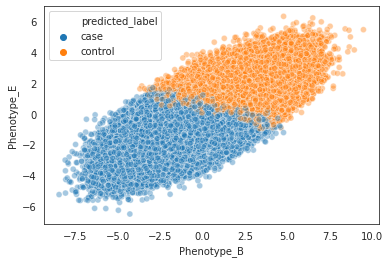

In [25]:
g = sns.scatterplot(data=full_df, x='Phenotype_B', y='Phenotype_E', hue='predicted_label', alpha=0.4)

In [24]:
import matplotlib.pyplot as plt
g = sns.set_style("white")
plt.savefig("/content/drive/My Drive/data_science_workshop/max_correlation.png")


<Figure size 432x288 with 0 Axes>

In [45]:
full_df.groupby(['predicted_label'])
full_df.head()

,Phenotype_A,Phenotype_B,Phenotype_C,Phenotype_D,Phenotype_E,predicted_label,sample_ID
0,1.050628,-0.445277,-0.463085,1.219458,-0.529953,case,Case_0
1,-0.121457,3.144045,0.729768,0.651428,2.094041,control,Case_1
2,1.562387,1.815261,-0.890487,1.739647,-0.879858,case,Case_2
3,0.120096,0.478846,-1.628602,0.120849,-1.273124,case,Case_3
4,0.880065,1.087070,-0.762285,0.716837,0.040455,control,Case_4


In [40]:
case_A = full_df.loc[full_df['predicted_label'] == 'case', 'Phenotype_A']
control_A = full_df.loc[full_df['predicted_label'] == 'control', 'Phenotype_A']
tt2_result_A = stats.ttest_ind(case_A, control_A)
print(tt2_result_A)

Ttest_indResult(statistic=125.81531296760492, pvalue=0.0)


In [37]:
case_B = full_df.loc[full_df['predicted_label'] == 'case', 'Phenotype_B']
control_B = full_df.loc[full_df['predicted_label'] == 'control', 'Phenotype_B']
tt2_result_B = stats.ttest_ind(case_B, control_B)
print(tt2_result_B)

Ttest_indResult(statistic=-612.2304614555765, pvalue=0.0)


In [38]:
case_C = full_df.loc[full_df['predicted_label'] == 'case', 'Phenotype_C']
control_C = full_df.loc[full_df['predicted_label'] == 'control', 'Phenotype_C']
tt2_result_C = stats.ttest_ind(case_C, control_C)
print(tt2_result_C)

Ttest_indResult(statistic=-129.29057422671738, pvalue=0.0)


In [41]:
case_D = full_df.loc[full_df['predicted_label'] == 'case', 'Phenotype_D']
control_D = full_df.loc[full_df['predicted_label'] == 'control', 'Phenotype_D']
tt2_result_D = stats.ttest_ind(case_D, control_D)
print(tt2_result_D)

Ttest_indResult(statistic=454.70409785658177, pvalue=0.0)


In [46]:
case_E = full_df.loc[full_df['predicted_label'] == 'case', 'Phenotype_E']
control_E = full_df.loc[full_df['predicted_label'] == 'control', 'Phenotype_E']
tt2_result_E = stats.ttest_ind(case_E, control_E)
print(tt2_result_E)

Ttest_indResult(statistic=-796.6133867609217, pvalue=0.0)


In [57]:
import csv
with open('t_test_results.csv', 'w', newline='') as csvfile:
  filewriter = csv.writer(csvfile)
  filewriter.writerow(['phenotype', 't_stat', 'p_value'])
  filewriter.writerow(['Phenotype_A', 125.81531296760492, 0.0])
  filewriter.writerow(['Phenotype_B', -612.2304614555765, 0.0])
  filewriter.writerow(['Phenotype_C', -129.29057422671738, 0.0])
  filewriter.writerow(['Phenotype_D', 454.70409785658177, 0.0])
  filewriter.writerow(['Phenotype_E', -796.6133867609217, 0.0])